<a href="https://colab.research.google.com/github/jrandrade07/Mackenzie_Tarefas/blob/main/Trilha_3_Tarefa.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### IMPORTANDO BIBLIOTECAS 

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA, FastICA
from sklearn.preprocessing import StandardScaler

### CARREGANDO E CONCATENANDO DATASETS 

In [ ]:
dfRed = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv", delimiter=';')
dfRed['type']='Red'
dfWhite = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv", delimiter=';')
dfWhite['type']='White'
df = pd.concat([dfRed, dfWhite])

### VERIFICANDO DADOS AUSENTES
#### NESSE CENÁRIO NÃO FORAM CONSTATADA AUSÊNCIA DE DADOS

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6497 entries, 0 to 4897
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6497 non-null   float64
 1   volatile acidity      6497 non-null   float64
 2   citric acid           6497 non-null   float64
 3   residual sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free sulfur dioxide   6497 non-null   float64
 6   total sulfur dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
 12  type                  6497 non-null   object 
dtypes: float64(11), int64(1), object(1)
memory usage: 710.6+ KB


### VERIFICANDO DADOS DUPLICADOS
#### FORAM LOCALIZADOS 2169 REGISTROS DUPLICADOS

In [ ]:
df[df.duplicated(keep=False)]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.400000,5,Red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.400000,5,Red
9,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.99780,3.35,0.80,10.500000,5,Red
11,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.99780,3.35,0.80,10.500000,5,Red
22,7.9,0.43,0.21,1.6,0.106,10.0,37.0,0.99660,3.17,0.91,9.500000,5,Red
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4851,6.4,0.33,0.44,8.9,0.055,52.0,164.0,0.99488,3.10,0.48,9.600000,5,White
4855,7.1,0.23,0.39,13.7,0.058,26.0,172.0,0.99755,2.90,0.46,9.000000,6,White
4856,7.1,0.23,0.39,13.7,0.058,26.0,172.0,0.99755,2.90,0.46,9.000000,6,White
4879,6.6,0.34,0.40,8.1,0.046,68.0,170.0,0.99494,3.15,0.50,9.533333,6,White


### REMOVENDO REGISTRO DUPLicaDOS 

In [ ]:
df = df.drop_duplicates(subset=None, keep='first', inplace=False, ignore_index=False)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5320 entries, 0 to 4897
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         5320 non-null   float64
 1   volatile acidity      5320 non-null   float64
 2   citric acid           5320 non-null   float64
 3   residual sugar        5320 non-null   float64
 4   chlorides             5320 non-null   float64
 5   free sulfur dioxide   5320 non-null   float64
 6   total sulfur dioxide  5320 non-null   float64
 7   density               5320 non-null   float64
 8   pH                    5320 non-null   float64
 9   sulphates             5320 non-null   float64
 10  alcohol               5320 non-null   float64
 11  quality               5320 non-null   int64  
 12  type                  5320 non-null   object 
dtypes: float64(11), int64(1), object(1)
memory usage: 581.9+ KB


SEPARANDO O TARGET DAS FEATURES

In [ ]:
X = df.drop(['type'], axis=1) #FEATURES
y = df['type'] # TARGET

NORMALIZANDO AS FEATURES E GERANDO GRÁFICO DE DISPERSÃO

In [ ]:
X_normalized = StandardScaler().fit(X).transform(X)
X_normalized

array([[ 0.14006434,  2.11534878, -2.16451528, ...,  0.1779407 ,
        -0.96915199, -0.90449728],
       [ 0.44319875,  3.18529696, -2.16451528, ...,  0.97938943,
        -0.63183308, -0.90449728],
       [ 0.44319875,  2.47199817, -1.89267181, ...,  0.77902725,
        -0.63183308, -0.90449728],
       ...,
       [-0.54198809, -0.61896323, -0.87325881, ..., -0.48993324,
        -0.96915199,  0.23226755],
       [-1.29982413, -0.32175541, -0.12568928, ..., -1.0242324 ,
         1.89805872,  1.36903238],
       [-0.92090611, -0.79728793,  0.41799765, ..., -1.42495677,
         1.05476146,  0.23226755]])

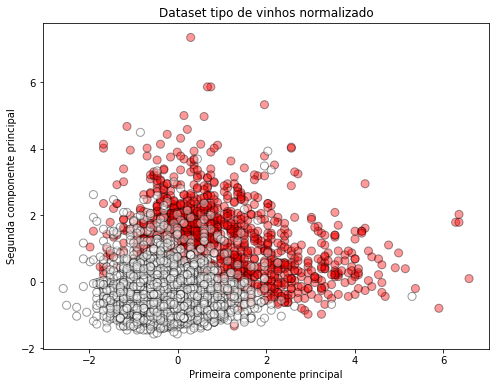

In [ ]:
plt.figure(figsize=(8,6))
plt.xlabel('Primeira componente principal')
plt.ylabel('Segunda componente principal')
plt.title('Dataset tipo de vinhos normalizado')
plt.scatter(X_normalized[:,0], X_normalized[:,1], c=y, s=65, alpha = 0.40, edgecolor='black', lw = 1)
plt.show()

REDUZINDO A DIMENSIONALIDADE COM PCA E GERANDO GRÁFICO DE DISPERSÃO

In [ ]:
pca = PCA(n_components=2).fit(X_normalized)
X_pca = pca.transform(X_normalized)
X_pca

array([[ 3.31332132e+00, -7.95843481e-04],
       [ 3.27933972e+00,  6.59153318e-01],
       [ 3.25836518e+00,  4.05384399e-01],
       ...,
       [-7.44122298e-01, -4.26953251e-01],
       [-1.22383183e+00, -3.52291617e+00],
       [-1.29944326e+00, -2.49321349e+00]])

No handles with labels found to put in legend.


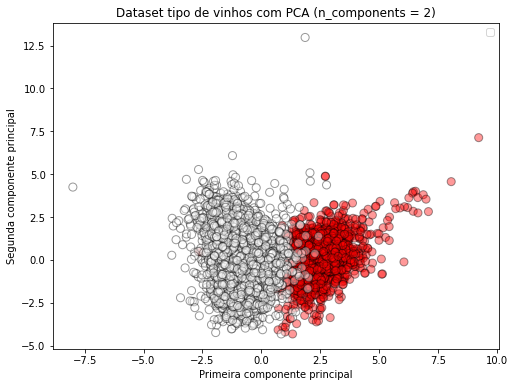

In [ ]:
plt.figure(figsize=(8,6))
plt.xlabel('Primeira componente principal')
plt.ylabel('Segunda componente principal')
plt.title('Dataset tipo de vinhos com PCA (n_components = 2)')
plt.scatter(X_pca[:,0], X_pca[:,1], c=y, s=65, alpha = 0.40, edgecolor='black', lw = 1)
plt.legend()
plt.show()

REDUZINHO A DIMENSIONALIDADE COM ICA  E GERANDO GRÁFICO DE DISPERSÃO

In [ ]:
ica = FastICA(n_components=2)
X_ica = ica.fit_transform(X_normalized)
X_ica

array([[-0.0206994 ,  0.01600353],
       [-0.02389717,  0.0114264 ],
       [-0.02245483,  0.01302207],
       ...,
       [ 0.00685586, -0.00073793],
       [ 0.02585088,  0.01764843],
       [ 0.02100264,  0.01039775]])

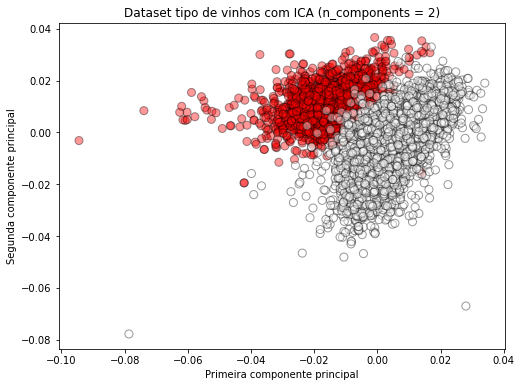

In [ ]:
plt.figure(figsize=(8,6))
plt.xlabel('Primeira componente principal')
plt.ylabel('Segunda componente principal')
plt.title('Dataset tipo de vinhos com ICA (n_components = 2)')
plt.scatter(X_ica[:,0], X_ica[:,1], c=y, s=65, alpha = 0.40, edgecolor='black', lw = 1)
plt.show()

#CONCLUSÃO

Podemos observar nos gráficos acima um similaridade entre a redução realizada com o PCA e o ICA. Para o cenário de análise de tipos de vinho as duas funções se adequam aos dados